<a href="https://colab.research.google.com/github/Saujanyapokhrel/Data-Processing-Visualization/blob/main/Exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exam #1

##Saujanya Pokhrel

##CPSMA 4313-01


#Resources
##https://github.com/nurfnick/Data_Viz/blob/main/12_GatheringConclusion.ipynb
##https://github.com/Saujanyapokhrel/Data-Processing-Visualization/blob/main/Saujanya.ipynb
##https://github.com/Saujanyapokhrel/Data-Processing-Visualization/blob/main/Quiz7.ipynb
##https://github.com/Saujanyapokhrel/Data-Processing-Visualization/blob/main/Quiz12.ipynb
##https://github.com/Saujanyapokhrel/Data-Processing-Visualization/blob/main/Quiz4.ipynb
##https://github.com/Saujanyapokhrel/Data-Processing-Visualization/blob/main/Quiz2.ipynb

#I attest that the resources above were the only ones utilized in completing the exam and the work included is my own and no one else from the course

#Importing all the required libraries.


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup


#getting the user authenticated.

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


# Question 1

## getting only Himalayas from https://en.wikipedia.org/wiki/List_of_mountains_by_elevation that are above 8000m.

In [ ]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
tables = html_soup.find_all('table',class_="wikitable sortable")
tables[0].find_all('a')
df = pd.read_html(str(tables))[0]

In [ ]:
df_himalayan=df[df.Range=="Himalayas"]
df_himalayan

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


#bar plot of ranges according to Metres

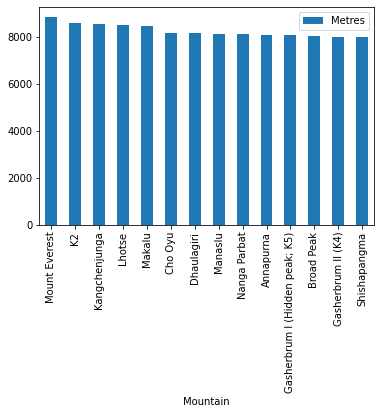

In [ ]:
df.plot.bar(x="Mountain",y="Metres")

The figure shows a barplot of the ranges in terms of meters(Metres) that are above 8000m.

#box plot of ranges deom the table in terms of Metres

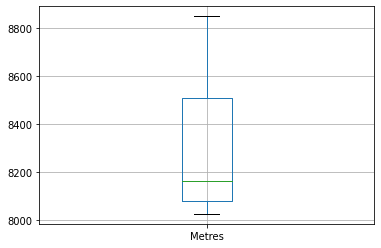

In [ ]:
df.boxplot(column="Metres")

# getting the mean, standard deviation, and five number summary in terms of feet.

In [ ]:
df.Feet.describe()

count       10.000000
mean     27295.600000
std        886.239521
min      26335.000000
25%      26690.250000
50%      26829.500000
75%      27914.500000
max      29029.000000
Name: Feet, dtype: float64

#getting the groups summary after grouping them by Range

In [ ]:
print(df.groupby("Range").mean())
print(df.groupby("Range").median())

            Metres     Feet
Range                      
Himalayas  8319.70  27295.6
Karakoram  8194.25  26884.0
           Metres     Feet
Range                     
Himalayas  8177.5  26829.5
Karakoram  8065.5  26461.5


# Question 2

# getting the number of totyal rows in the dataset bigquery-public-data.chicago_taxi_trips.taxi_trips

In [ ]:
%%bigquery --project data-visualization-338722
SELECT COUNT(*) as total_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`


,total_rows
0,198792903


##There are 198792903 number of rows in the dataset.

#sorting the daset into a table with columns payment_type and average trip.

In [ ]:
%%bigquery --project data-visualization-338722
SELECT  payment_type, AVG(trip_total) as avg_trip_total
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY payment_type

,payment_type,avg_trip_total
0,Unknown,17.649893
1,Mobile,20.339910
2,Prepaid,22.377662
3,Dispute,15.496588
4,Pcard,10.116931
5,Way2ride,16.639366
6,Split,18.788039
7,Credit Card,20.524892
8,Prcard,20.320682
9,Cash,12.265548


##The table shows the different form of payment and average number of trip based on payment type.

# counting the number of trips that had a non-zero recorded time and were above the average time as counted_value.

In [ ]:
%%bigquery --project data-visualization-338722
SELECT  COUNT(*) as counted_value
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds IS NOT NULL AND trip_seconds>(SELECT AVG(trip_seconds) FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`)

,counted_value
0,62143014


## There were 62143014 trips that had a non-zero recorded time and were above the average time.

#Question 3


##(a) Approximately how long did you work on this exam?
    It took around 2 hrs to complete the exam.

##(b) Which was the hardest and easiest topic from this section?
    In the second question, the 3rd part was a bit confusing.

##(c) Which method of gathering data are you most excited to use again?
    Extracting data using the Big Query dataset.